In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.rename(columns={'gender': 'sex',
                    'math score': 'MathScore',
                    'reading score':'ReadingScore',
                    'writing score': 'WritingScore'},inplace=True)

In [6]:
df.head(15)

,sex,race/ethnicity,parental level of education,lunch,test preparation course,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sex                          1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   MathScore                    1000 non-null   int64 
 6   ReadingScore                 1000 non-null   int64 
 7   WritingScore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,MathScore,ReadingScore,WritingScore
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.isnull().sum()

sex                            0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
MathScore                      0
ReadingScore                   0
WritingScore                   0
dtype: int64

In [10]:
gecmenotu = 50

In [20]:
df['MathPassStatus'] = np.where(df['MathScore'] < gecmenotu,'F','P')
df.MathPassStatus.value_counts()

P    865
F    135
Name: MathPassStatus, dtype: int64

[None, None, None, None, None, None, None, None, None, None, None, None]

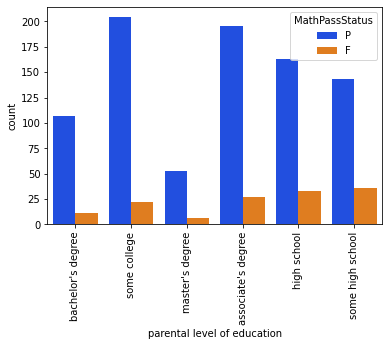

In [25]:
p = sns.countplot(x='parental level of education',data=df,hue='MathPassStatus',palette='bright')
plt.setp(p.get_xticklabels(),rotation=90)

In [26]:
df['ReadingPassStatus'] = np.where(df['ReadingScore'] < gecmenotu, 'F','P')
df.ReadingPassStatus.value_counts() 

P    910
F     90
Name: ReadingPassStatus, dtype: int64

[None, None, None, None, None, None, None, None, None, None, None, None]

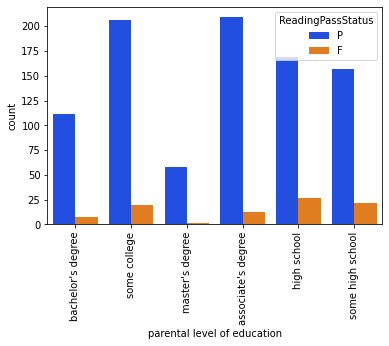

In [27]:
p = sns.countplot(x='parental level of education',data=df,hue='ReadingPassStatus',palette='bright')
plt.setp(p.get_xticklabels(),rotation=90)

In [28]:
df['WritingPassStatus'] = np.where(df['WritingScore'] < gecmenotu,'F','T')
df.WritingPassStatus.value_counts()

T    886
F    114
Name: WritingPassStatus, dtype: int64

[None, None, None, None, None, None, None, None, None, None, None, None]

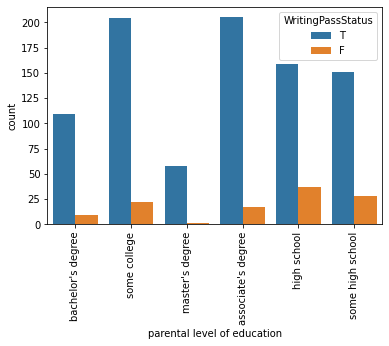

In [30]:
p = sns.countplot(x='parental level of education',data=df,hue='WritingPassStatus')
plt.setp(p.get_xticklabels(),rotation=90)

In [35]:
df['OverAllPassStatus'] = df.apply(lambda x: 'F' 
                                   if x['MathPassStatus'] == 'F'
                                   or x['ReadingPassStatus'] == 'F'
                                   or x['WritingPassStatus'] == 'F'
                                   else 'T',axis=1)
df.OverAllPassStatus.value_counts()

T    812
F    188
Name: OverAllPassStatus, dtype: int64

In [38]:
total = df['MathScore'] + df['ReadingScore'] + df['WritingScore']
df['Mean'] = total/3

In [39]:
df.head()

,sex,race/ethnicity,parental level of education,lunch,test preparation course,MathScore,ReadingScore,WritingScore,MathPassStatus,ReadingPassStatus,WritingPassStatus,OverAllPassStatus,Mean
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,T,T,72.666667
1,female,group C,some college,standard,completed,69,90,88,P,P,T,T,82.333333
2,female,group B,master's degree,standard,none,90,95,93,P,P,T,T,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,49.333333
4,male,group C,some college,standard,none,76,78,75,P,P,T,T,76.333333


In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])
df.head()

,sex,race/ethnicity,parental level of education,lunch,test preparation course,MathScore,ReadingScore,WritingScore,MathPassStatus,ReadingPassStatus,WritingPassStatus,OverAllPassStatus,Mean
0,0,group B,bachelor's degree,standard,none,72,72,74,P,P,T,T,72.666667
1,0,group C,some college,standard,completed,69,90,88,P,P,T,T,82.333333
2,0,group B,master's degree,standard,none,90,95,93,P,P,T,T,92.666667
3,1,group A,associate's degree,free/reduced,none,47,57,44,F,P,F,F,49.333333
4,1,group C,some college,standard,none,76,78,75,P,P,T,T,76.333333


In [49]:
def GetGrade(Mean,OverAllPastStatus):
  if (OverAllPastStatus == 'F'):
    return 'F'
  if (Mean >= 80):
    return 'A'
  if (Mean >= 70):
    return 'B'
  if (Mean >= 60):
    return 'C'
  if (Mean >= 50):
    return 'D'
  else:
    return 'F'

df['GradeStatus'] = df.apply(lambda x: GetGrade(x['Mean'],x['OverAllPassStatus']),axis=1)

df.GradeStatus.value_counts()

B    261
C    255
A    198
F    188
D     98
Name: GradeStatus, dtype: int64

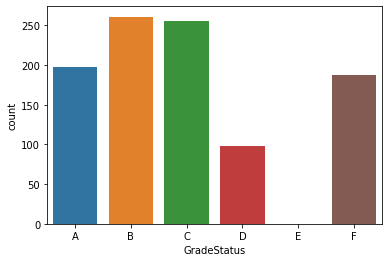

In [53]:
sns.countplot(x='GradeStatus',order=['A','B','C','D','E','F'],data=df)

[None, None, None, None, None, None, None, None, None, None, None, None]

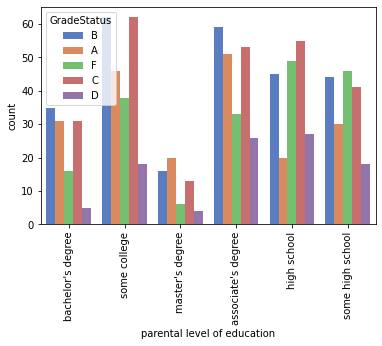

In [56]:
p = sns.countplot(x='parental level of education',data=df, hue='GradeStatus',palette='muted')
plt.setp(p.get_xticklabels(),rotation=90)

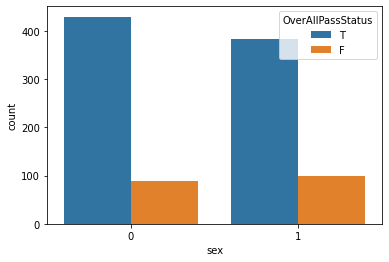

In [57]:
sns.countplot(x='sex',data=df,hue='OverAllPassStatus')